# Q1-a.
Keras/Python Project: Keras comes with another set of data very similar to the NIST data for hand written digits. The data set is called Fashion-MNIST. Similarly to NIST data, there are ten classes, showing pictures of clothing items. These items are stored in a low-resolution 28*28 images made up of integers between zero and representing the grey scale of the pixel they are representing. This data is stored in the Keras package in keras.datasets.fashion mnist. For programming problems supply ample documentation, explaining what you are doing. I expect to be able to run your code on my laptop Running Python 3.7.

(a). Write a script implementing a one{hidden-layer neural network to learn various clothing items. Use the Keras Sequential approach to building your neural net. Use ReLU activation function for the layer. Use 512 units for hidden layer. Using five epochs fit the model to the data and print the results on test data. Import from sklearn.metrics the function confusion matrix (and study its documentation.) Print the confusion matrix of the errors on the test data. When printing the confusion matrix, write the actual names of classes (e.g. trousers, sandals, etc.,) not the numerical codes, for both actual and predicted values. These names are in order: names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] So item 0' is T-shirt/Top, item1' is Trouser, etc. Write the script in file called Q1a.py.

In [1]:
from keras.datasets import fashion_mnist

from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [3]:
network = models.Sequential()

network.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

In [4]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [5]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype("float32")/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype("float")/255

In [6]:
from keras.utils import to_categorical

# Make labels from multi-dimensonials to a vector !
train_labels01 = to_categorical(train_labels)
test_labels01 = to_categorical(test_labels)

In [7]:
network.fit(train_images, train_labels01, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels01)
print("test accuarcy: {}".format(test_acc))

Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.5546 - accuracy: 0.8010
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.3812 - accuracy: 0.8590
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.3367 - accuracy: 0.8766
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.3103 - accuracy: 0.8852
Epoch 5/5
10000/10000 [==============================] - 0s 46us/step
test accuarcy: 0.8597000241279602


In [8]:
# Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix

pred = network.predict(test_images)
# We can not use "test_labels01" because it handles after "to_categorical" method ! 
# So we use "test_labels".
confusionMatrix = confusion_matrix(test_labels, list(map(np.argmax,pred)))
print("The confustion matrix:\n", confusionMatrix)

The confustion matrix:
 [[849   0  18  81   1   2  44   0   5   0]
 [  2 956   0  36   3   0   2   0   1   0]
 [ 20   0 906  19  34   0  20   0   1   0]
 [ 16   1  15 942  15   0   8   0   3   0]
 [  0   0 285  55 638   0  21   0   1   0]
 [  0   0   0   1   0 946   0  29   2  22]
 [184   0 195  71  66   0 469   0  15   0]
 [  0   0   0   0   0  10   0 972   0  18]
 [  4   0   7   8   1   1   1   6 972   0]
 [  0   0   0   1   0   2   1  49   0 947]]


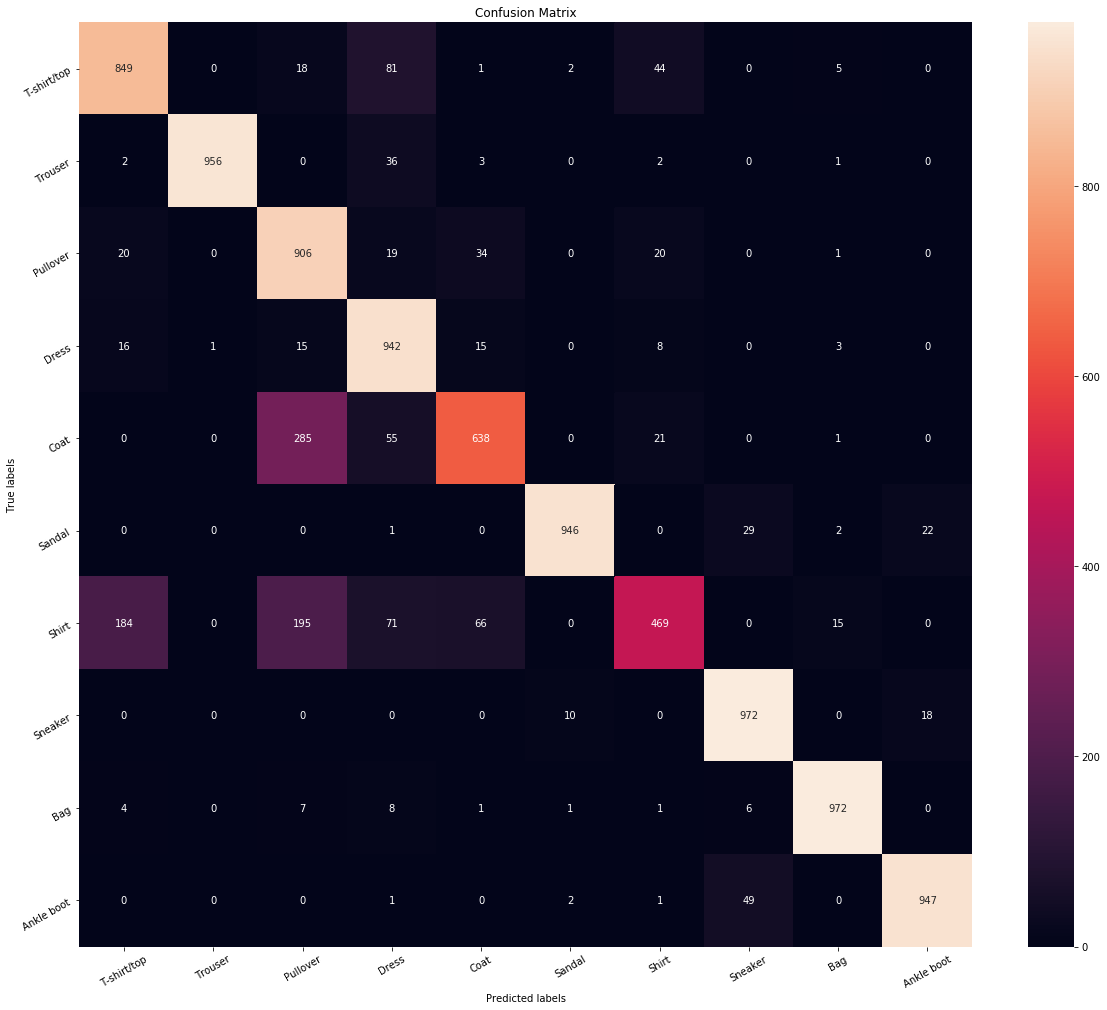

In [9]:
# Heatmap of confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

fig, axes = plt.subplots(figsize=(20, 17))
sns.heatmap(confusionMatrix, annot = True, ax = axes, fmt = 'g'); #annot=True to annotate cells

# labels, title and ticks
axes.set_xlabel('Predicted labels')
axes.set_ylabel('True labels')
axes.set_title('Confusion Matrix')
axes.xaxis.set_ticklabels(names, rotation=30)
axes.yaxis.set_ticklabels(names, rotation=30)

b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.show()

注意：axes是整个图像的画法，里面包含了各种elements。The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system！参见：https://zhuanlan.zhihu.com/p/93423829

# Q1-b.
(b). Repeat part 1a) but this time use the functional form to build the
same model. Experiment with the number of epochs set at 5, and
set at 20. Make sure to print the confusion table for bith epoch set
at 5, and set at 20. Write the script in a 
le called Q1b.py.

In [10]:
from keras.datasets import fashion_mnist

from keras.layers import Input, Flatten, Dense
from keras.models import Model

import numpy as np
np.random.seed(9)

In [11]:
inputLayer = Input(shape=(28,28))
tmp = Flatten()(inputLayer)
tmp = Dense(units=512, activation="relu")(tmp)
outputLayer = Dense(units=10, activation="softmax")(tmp)

In [12]:
network = Model(inputLayer, outputLayer)

network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.astype("float32")/255
test_images = test_images.astype("float")/255

In [14]:
# epochs = 5
from keras.utils import to_categorical

train_labels01 = to_categorical(train_labels)
test_labels01 = to_categorical(test_labels)
network.fit(train_images, train_labels01, epochs=5, batch_size=128)
# network.fit(train_images, train_labels, epochs=20, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels01)
print("test accuracy:{}".format(test_acc))

Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.5583 - accuracy: 0.8039
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3803 - accuracy: 0.8601
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3370 - accuracy: 0.8761
Epoch 4/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3092 - accuracy: 0.8858
Epoch 5/5
10000/10000 [==============================] - 1s 58us/step
test accuracy:0.875


The confustion matrix:
 [[756   1  25  54   8   1 143   0  12   0]
 [  1 969   0  24   4   0   1   0   1   0]
 [  7   0 809  12 130   0  39   0   3   0]
 [  6   3  15 901  46   0  24   0   5   0]
 [  0   0  97  24 864   0  13   0   2   0]
 [  0   0   0   1   0 945   0  32   2  20]
 [ 66   0 112  46 151   0 609   0  16   0]
 [  0   0   0   0   0  12   0 975   0  13]
 [  2   0   4   3   7   1   2   4 977   0]
 [  0   0   0   0   0   3   1  51   0 945]]


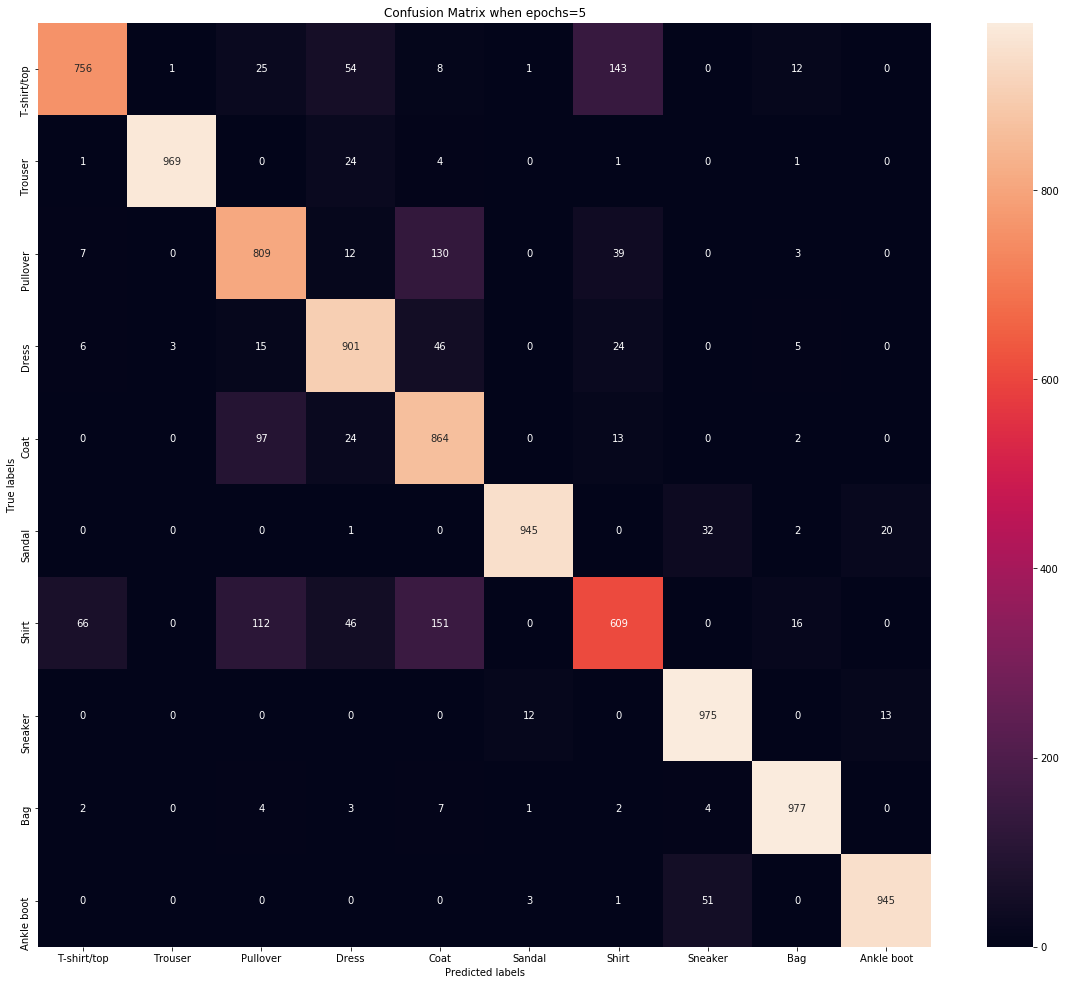

In [15]:
# Confusion Matrix when epochs = 5
import numpy as np
from sklearn.metrics import confusion_matrix

pred = network.predict(test_images)
# We can not use "test_labels" because it handles after "to_categorical" method !
confusionMatrix = confusion_matrix(test_labels, list(map(np.argmax,pred)))
print("The confustion matrix:\n", confusionMatrix)


import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize = (20,17))
ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix when epochs=5' )
ax.xaxis.set_ticklabels(names); ax.yaxis.set_ticklabels(names)

b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.show()

The confustion matrix:
 [[756   1  25  54   8   1 143   0  12   0]
 [  1 969   0  24   4   0   1   0   1   0]
 [  7   0 809  12 130   0  39   0   3   0]
 [  6   3  15 901  46   0  24   0   5   0]
 [  0   0  97  24 864   0  13   0   2   0]
 [  0   0   0   1   0 945   0  32   2  20]
 [ 66   0 112  46 151   0 609   0  16   0]
 [  0   0   0   0   0  12   0 975   0  13]
 [  2   0   4   3   7   1   2   4 977   0]
 [  0   0   0   0   0   3   1  51   0 945]]


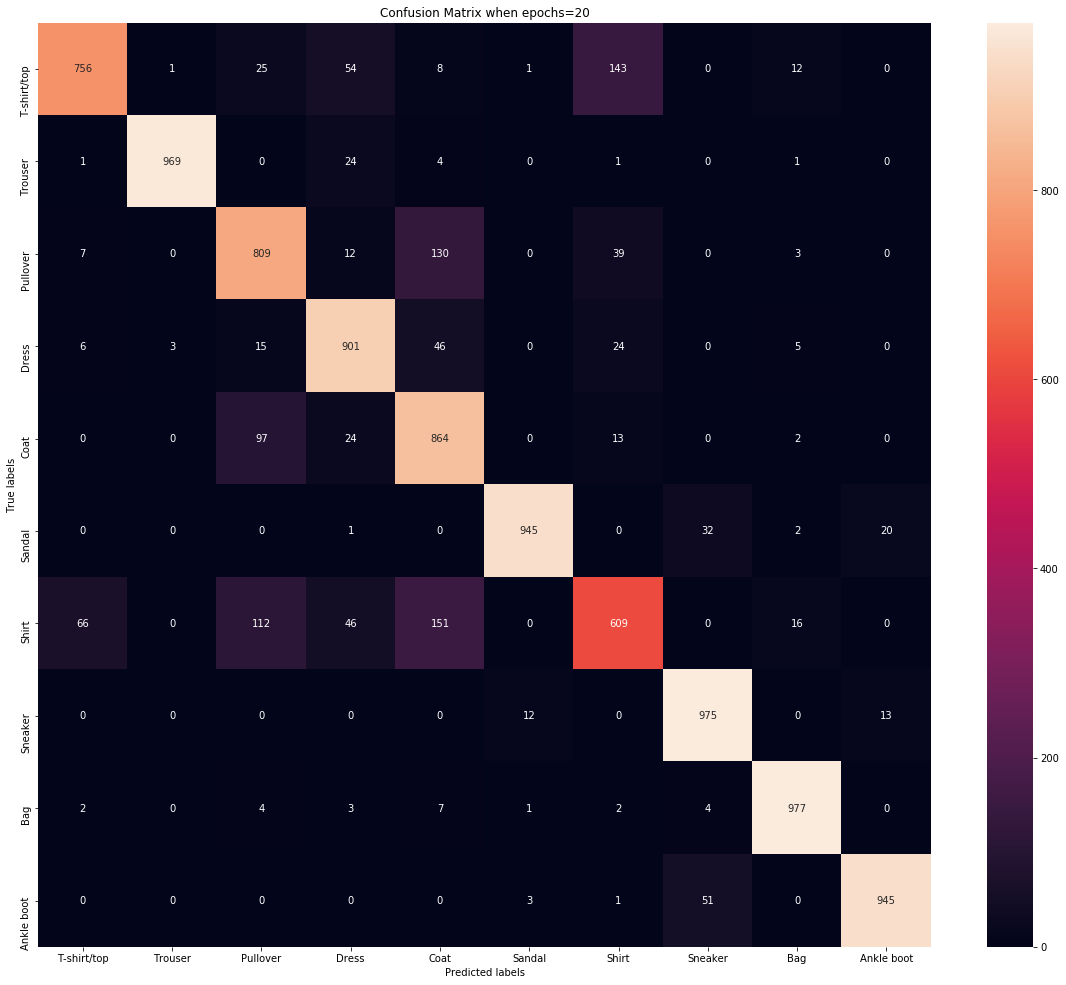

In [16]:
# Confusion Matrix when epochs = 20
import numpy as np
from sklearn.metrics import confusion_matrix

pred = network.predict(test_images)
# We can not use "test_labels" because it handles after "to_categorical" method !
confusionMatrix = confusion_matrix(test_labels, list(map(np.argmax,pred)))
print("The confustion matrix:\n", confusionMatrix)


import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize = (20,17))
ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix when epochs=20')
ax.xaxis.set_ticklabels(names)
ax.yaxis.set_ticklabels(names)

b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.show()

# Q1-c.
(c). Write a Python script that runs through the test data. For each
one if your model in parts a) or b) predicts incorrectly, it should
draw the pattern, and also show the value of the predicted softmax
function for this incorrectly classi
ed pattern. Examine and print the
percentage of times among incorrect prediction, the second choice was
the correct one. Again, write the actual names of classes not their
numerical codes for both actual and predicted values, as well as the
class probabilities. Write the script in a 
le called Q1c.py.

In [17]:
from keras.datasets import fashion_mnist

from keras import models
from keras import layers

In [18]:
# split training and test data
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [19]:
network = models.Sequential()

network.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

In [20]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype("float32")/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype("float")/255

In [22]:
from keras.utils import to_categorical

train_labels01 = to_categorical(train_labels)
test_labels01 = to_categorical(test_labels)

In [23]:
network.fit(train_images, train_labels01, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels01)
print("test accuarcy: {}".format(test_acc))

Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.5513 - accuracy: 0.8051
Epoch 2/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3790 - accuracy: 0.8607
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3365 - accuracy: 0.8758
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.3099 - accuracy: 0.8863
Epoch 5/5
10000/10000 [==============================] - 0s 47us/step
test accuarcy: 0.8762000203132629


In [24]:
def class_name(label_num):
    label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    dictionary = dict(zip(label, names))
    return dictionary[label_num]

while True:
    test_label = int(input("type the index of the label which you want to check: "))
    print("label of this images:", class_name(test_label))
    if input("continue? y/n： ") == "n":
        break

type the index of the label which you want to check: 1
label of this images: Trouser
continue? y/n： n


The confustion matrix:
 [[815   1  23  68   5   1  70   0  17   0]
 [  2 974   0  18   3   0   2   0   1   0]
 [ 11   0 820  13 101   0  51   0   4   0]
 [ 11   6  16 927  20   0  10   0  10   0]
 [  0   1 127  42 779   0  47   0   4   0]
 [  0   0   0   0   0 969   0  20   2   9]
 [132   1 105  63  85   0 582   0  32   0]
 [  0   0   0   0   0  16   0 956   2  26]
 [  1   0   4   1   4   2   1   1 986   0]
 [  0   0   0   0   0  13   1  32   0 954]]


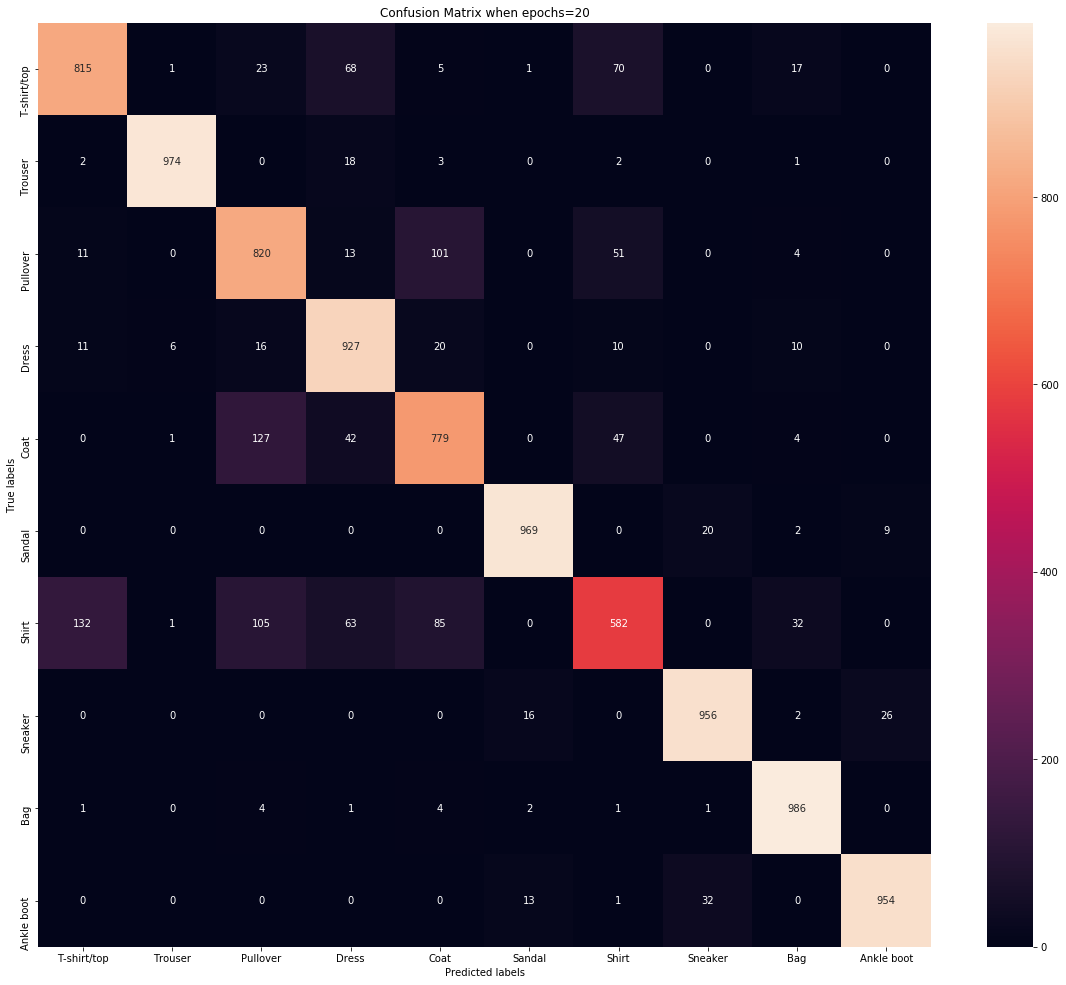

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix

pred = network.predict(test_images)
# We can not use "test_labels" because it handles after "to_categorical" method !
confusionMatrix = confusion_matrix(test_labels, list(map(np.argmax,pred)))
print("The confustion matrix:\n", confusionMatrix)


import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize = (20,17))
ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix when epochs=20')
ax.xaxis.set_ticklabels(names)
ax.yaxis.set_ticklabels(names)

b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.show()

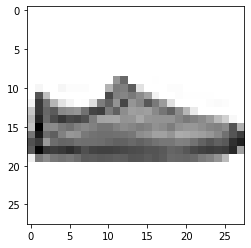

Predicted value of 12 : Sandal, 
actural value is : Sneaker
The second choice is : Sneaker


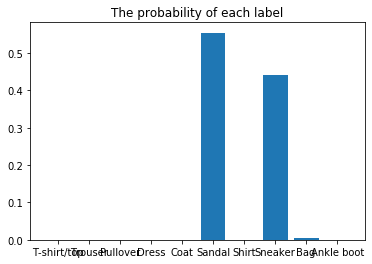

The second choice is correct!
continue? y/n: y


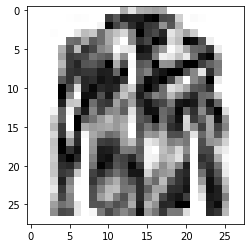

Predicted value of 17 : Pullover, 
actural value is : Coat
The second choice is : Coat


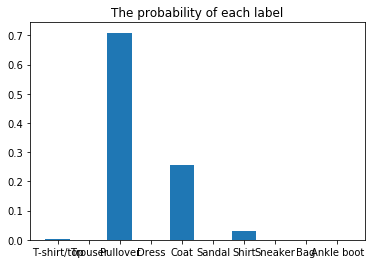

The second choice is correct!
continue? y/n: y


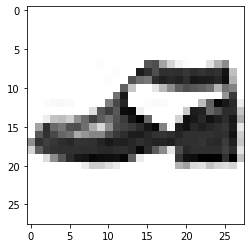

Predicted value of 23 : Sandal, 
actural value is : Ankle boot
The second choice is : Ankle boot


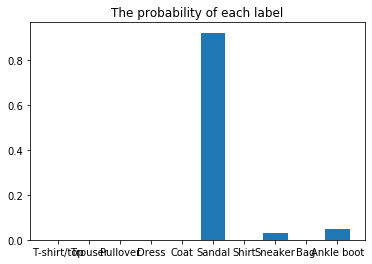

The second choice is correct!
continue? y/n: y


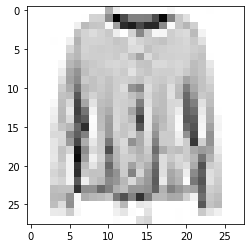

Predicted value of 25 : Pullover, 
actural value is : Coat
The second choice is : Shirt


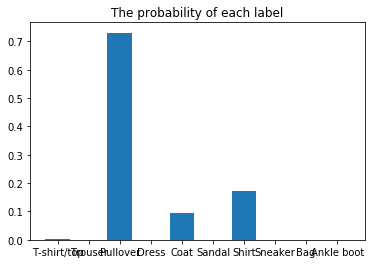

The second choice is incorrect!
continue? y/n: y


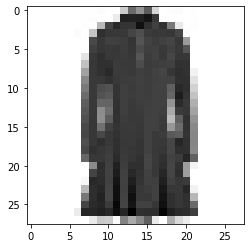

Predicted value of 29 : Coat, 
actural value is : Dress
The second choice is : Dress


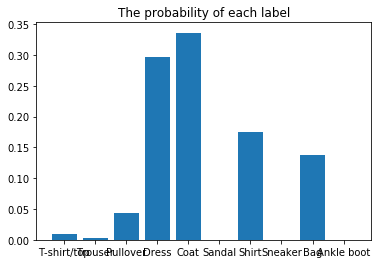

The second choice is correct!
continue? y/n: y


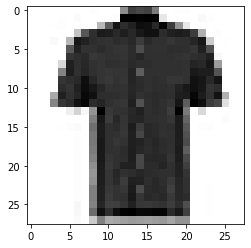

Predicted value of 40 : T-shirt/top, 
actural value is : Shirt
The second choice is : Shirt


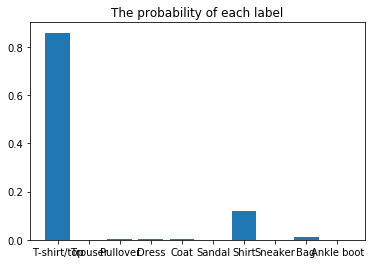

The second choice is correct!
continue? y/n: y


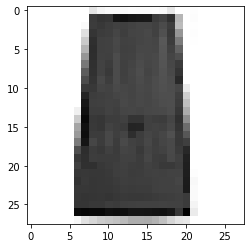

Predicted value of 42 : Shirt, 
actural value is : Dress
The second choice is : Dress


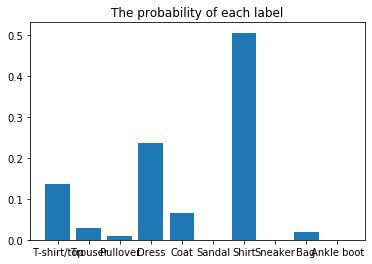

The second choice is correct!
continue? y/n: n


In [26]:
pred = network.predict(test_images)
for i in range(len(test_images)):
    if test_labels[i] != np.argmax(pred[i]):
        plt.imshow(test_images[i].reshape(28,28), cmap=plt.cm.binary)
        plt.show()
        print("Predicted value of {0} : {1}, \nactural value is : {2}" \
              .format(i, class_name(np.argmax(pred[i])), class_name(test_labels[i])))
        # The second choice of the predicitions
        print("The second choice is : {}".format(class_name(np.argsort(pred[i])[-2])))
        plt.bar(names, pred[i])
        plt.title("The probability of each label")
        plt.show()
        if np.argsort(pred[i])[-2] == test_labels[i]:
            print("The second choice is correct!")
        else:
            print("The second choice is incorrect!")
        if input("continue? y/n: ")=='n':
            break

# Q1-d.
(d). Repeat part b) but this time use the logistic (sigmoid) function as
your activation function. Compare the results. Write the script in a
file called Q1d.py.

In [27]:
from keras.datasets import fashion_mnist

from keras.layers import Input, Flatten, Dense
from keras.models import Model

import numpy as np
np.random.seed(9)

In [28]:
inputLayer = Input(shape=(28,28))
tmp = Flatten()(inputLayer)
tmp = Dense(units=512, activation="sigmoid")(tmp)
outputLayer = Dense(units=10, activation="softmax")(tmp)

In [29]:
network = Model(inputLayer, outputLayer)

network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.astype("float32")/255
test_images = test_images.astype("float")/255

In [31]:
# When epochs=20
from keras.utils import to_categorical

train_labels01 = to_categorical(train_labels)
test_labels01 = to_categorical(test_labels)
network.fit(train_images, train_labels01, epochs=20, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels01)
print("test accuracy:{}".format(test_acc))

Epoch 1/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.5906 - accuracy: 0.7920
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.4275 - accuracy: 0.8452
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.3865 - accuracy: 0.8603
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.3583 - accuracy: 0.8700
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.3390 - accuracy: 0.8764
Epoch 6/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.3215 - accuracy: 0.8821
Epoch 7/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.3079 - accuracy: 0.8865
Epoch 8/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.2957 - accuracy: 0.8911
Epoch 9/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2839 - accuracy: 0.8959
Epoch 10/20
60000/60000 [==============================

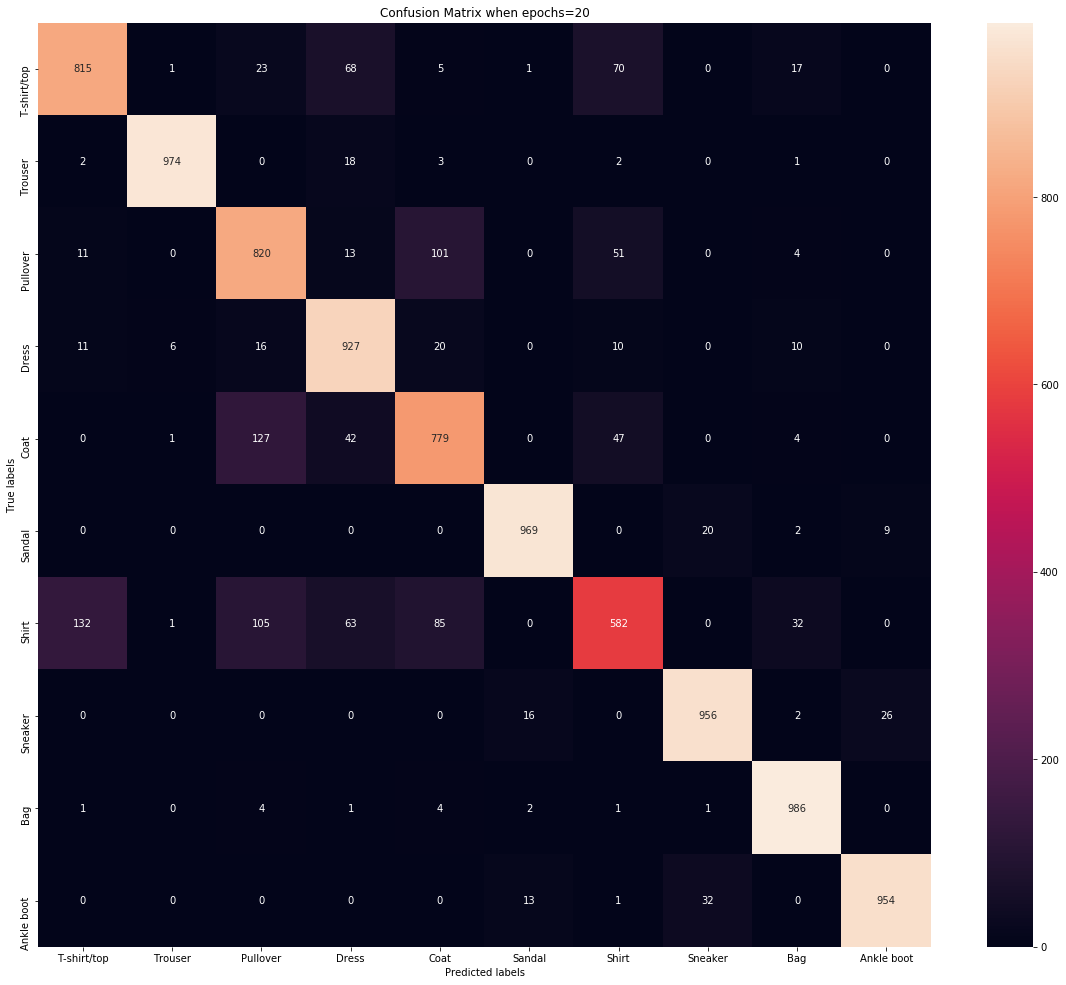

In [32]:
plt.figure(figsize = (20,17))
ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix when epochs=20')
ax.xaxis.set_ticklabels(names)
ax.yaxis.set_ticklabels(names)

b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.show()

In [33]:
# When epochs=5
from keras.utils import to_categorical

train_labels01 = to_categorical(train_labels)
test_labels01 = to_categorical(test_labels)
network.fit(train_images, train_labels01, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels01)
print("test accuracy:{}".format(test_acc))

Epoch 1/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.2008 - accuracy: 0.9253
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1956 - accuracy: 0.9257
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.1908 - accuracy: 0.9293
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.1860 - accuracy: 0.9312
Epoch 5/5
10000/10000 [==============================] - 0s 42us/step
test accuracy:0.8913999795913696


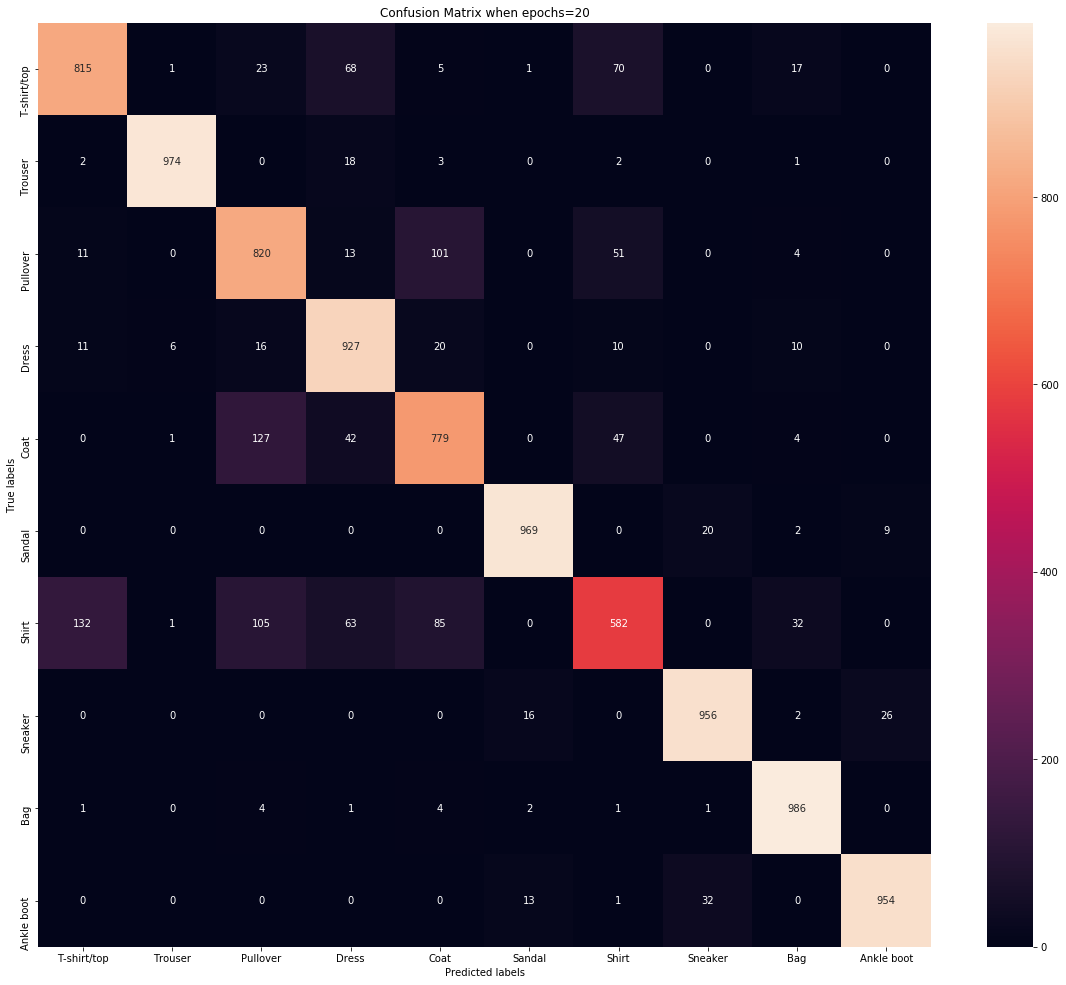

In [34]:
plt.figure(figsize = (20,17))
ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix when epochs=20')
ax.xaxis.set_ticklabels(names)
ax.yaxis.set_ticklabels(names)

b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.show()

Conclusion:
    Compared with activation=relu, the results do not change when we set activation=sigmoid. But the accuarcy when epochs=5 is a little better than epochs=20